# **Part-I: Multiple Linear Regression:**

## Necessary Imports


In [1222]:
# Importing libraries for data analysis and visualization: Numpy, Matplotlib, Pandas, Seaborn, scikit-learn, and Plotly.
import numpy as np #This line of code imports the numpy module and assigns the alias np to it.
import matplotlib.pyplot as plt #This line of code imports the math plot module and assigns the alias plt to it.
import pandas as pd #This line of code imports the panda module and assigns the alias pd to it.
import seaborn as sns #This line of code imports the seaborn module and assigns the alias sns to it.
import plotly.express as px  #This line of code imports the plotly.express module and assigns the alias px to it.

In [1223]:
from google.colab import drive #mouting the contents on google collab from the file saved in the google drive.
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1224]:
#giving path to the dataset
path = "/content/drive/MyDrive/AI_Final_Portfolio/4.csv" 

In [1225]:
#reading the dataset using pandas library
path = pd.read_csv(path)

## 1. Data Understanding, Cleaning and Transformation:

Understand what is data about and why do you think the data was collected, and what research questions
data can answers.

(a) You can explain your logic in the text cell of your notebook.

(b) Based on your research questions Identify Dependent and Independent Variables.

(c) Use pandas to load your dataset and observe the data.

If required perform basic data cleaning and Transformation the way you fits your task requirements.

The data set consists of information regarding insurance policies and the claims made by policyholders. This information comprises of  a range of characteristics, including the policyholder's age, gender, yearly earnings, and policy coverage details, as well as details regarding the claim, such as the date it was made, the type of loss, and the amount claimed.Insurance companies gather and examine information to have a better comprehension of their policyholders, evaluate the danger connected with offering coverage, and make informed choices regarding pricing, advertising, and writing policies. This information can also be utilized to recognize trends and patterns in claims behavior, which can assist insurance companies with making better forecasts about the probability of claims being made in the future.


The attributes of the data above about medical insurance claims are:

Age: the policy holder's age 

Sex: the policy holder's gender


BMI: The policy holder's body mass index


Children: The policy holder's total number of children

Smoker: Whether or not the policy holder smokes


Region: The area where the policy holder's is physically located


Charges: The policy holder'sreported medical insurance costs


The information was likely gathered to investigate the association between a patient's numerous demographic and health variables and the medical insurance claims they make.
The information can assist in addressing research queries like:


1. How do a patient's medical insurance claims affect by age, sex, BMI, number of children, smoking habit, and region?

2. What health and demographic variables have a major impact on medical insurance costs?

3. How does a patient's location affect the costs of their health insurance?

According to the study questions, the independent variables would be age, sex, BMI, children, smokers, and region, whereas the dependent variable would be the medical insurance charges (charges).

In [1226]:
#Checking the information of a DataFrame object using the .info() method
path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [1227]:
#Checking the datatypes of the dataframe.
path.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [1228]:
#viewing first 5 data
path.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1229]:
#viewing last 5 data
path.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [1230]:
#checking for null values
path.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [1231]:
#Obtaining descriptive statistics of the numerical columns
path.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [1232]:
#checking shape of the dataset
path.shape

(1338, 7)

In [1233]:
#Viewing all the columns in the dataset
path.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [1234]:
#Calculating the pairwise correlation between columns in the DataFrame
path.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [1235]:
#Checking the sum of null values is any is null
path.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [1236]:
#Grouping the rows of the DataFrame by the values in the "charges" column using the .groupby() method
path.groupby('charges').mean()

,age,bmi,children
charges,,,
1121.87390,18.0,23.210,0.0
1131.50660,18.0,30.140,0.0
1135.94070,18.0,33.330,0.0
1136.39940,18.0,33.660,0.0
1137.01100,18.0,34.100,0.0
...,...,...,...
55135.40209,33.0,35.530,0.0
58571.07448,31.0,38.095,1.0
60021.39897,52.0,34.485,3.0


In [1237]:
#gives only the categorical data from the dataset
object_data=[features for features in path.dtypes[path.dtypes == 'object'].index]
object_data

['sex', 'smoker', 'region']

In [1238]:
# Get unique values in the "sex" column
path['sex'].unique()

array(['female', 'male'], dtype=object)

In [1239]:
#Mapping the unique values of column sex into ordinal number
path['sex'] = path['sex'].map({'female': 0, 'male': 1})

In [1240]:
# Get unique values in the "smoker" column
path['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [1241]:
#Mapping the unique values of column smoker into ordinal number
path['smoker'] = path['smoker'].map({'no': 0, 'yes': 1})

In [1242]:
# Get unique values in the "region" column
path['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [1243]:
#Mapping the unique values of column region into ordinal number
path['region'] = path['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

In [1244]:
#print all the data after converting it into numerical form
path

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [1245]:
#Checking if all the categorical data is converted into numerical type
num_data=[features for features in path.dtypes[path.dtypes != 'object'].index]
num_data

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [1246]:
#Checking for duplicate data in the dataset
print('Duplicate values present:', path.duplicated().sum())

Duplicate values present: 1


In [1247]:
#Droping any duplicate values present in the dataset.
path = path.drop_duplicates()
path

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


## 2. Data Analysis and Visualization:

Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make
various plots to generate insights from dataset.

To generate better insights from the data make visualization and plot of your Independent variable against
Dependent variable.

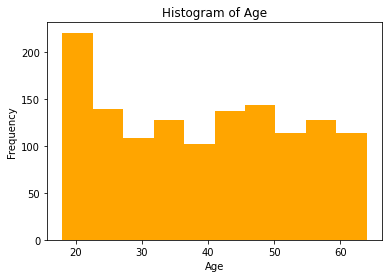

In [1248]:
# Creating a histogram of the values in the "age" colum and setting the color of the bars to "orange".
plt.hist(path['age'],color='orange')
#Setting x-axis as Age
plt.xlabel("Age")
#Setting y-axis as Frequency
plt.ylabel("Frequency")
#Adding the title of the histogram
plt.title("Histogram of Age")
#plotting the histogram 
plt.show()

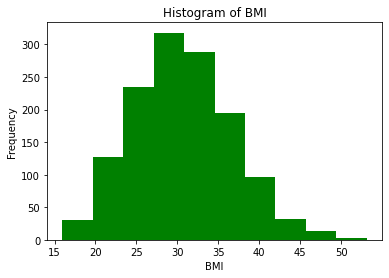

In [1249]:
# Creating a histogram of the values in the "age" column and setting the color of the bars to "green".
plt.hist(path['bmi'],color='green')
#Setting x-axis as BMI
plt.xlabel("BMI")
#Setting y-axis as Frequency
plt.ylabel("Frequency")
#Adding the title of the histogram
plt.title("Histogram of BMI")
plt.show()

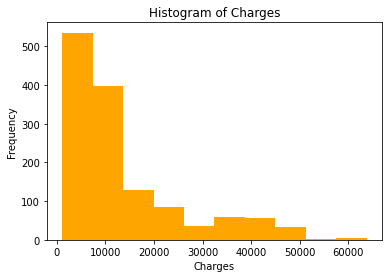

In [1250]:
# Creating a histogram of the values in the "age" column and setting the color of the bars to "green".
plt.hist(path['charges'],color='orange')
#Setting x-axis as Charges
plt.xlabel("Charges")
#Setting y-axis as Frequency
plt.ylabel("Frequency")
#Adding the title of the Histogram
plt.title("Histogram of Charges")
plt.show()

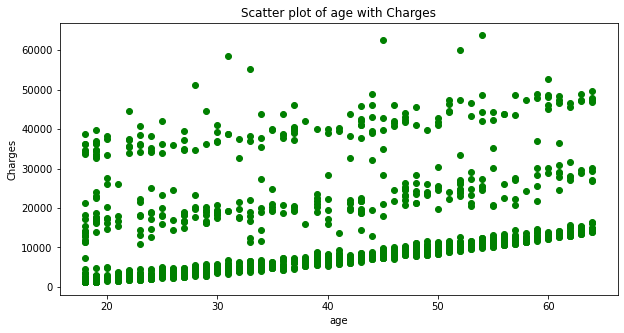

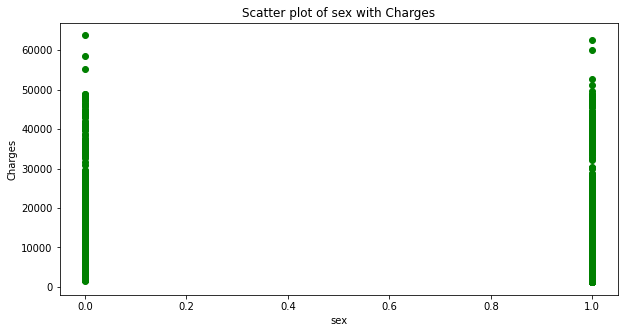

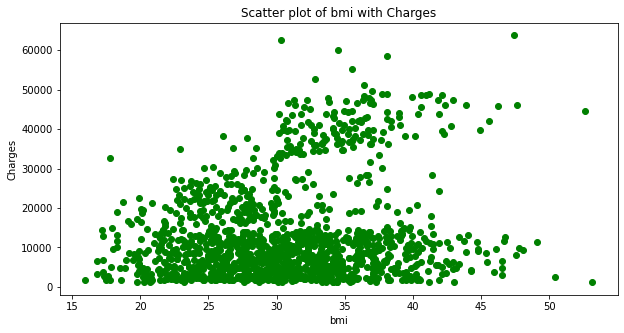

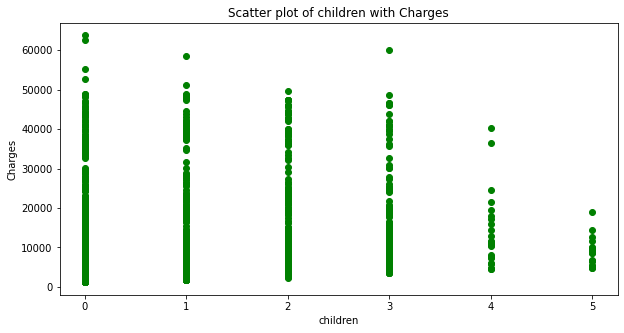

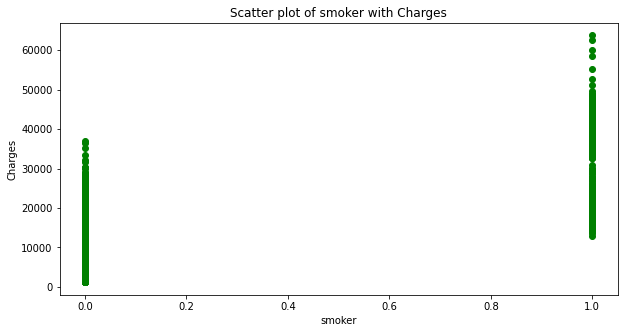

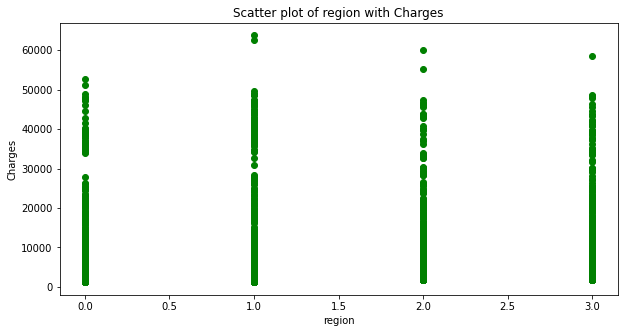

In [1251]:
# Loop over all the columns except the last one in the dataframe "path"
for column in path.columns[:-1]:
    # Creating a new figure with specified size
    plt.figure(figsize=(10,5))
    # Plotting a scatter plot with column values on the x-axis and "charges" on the y-axis
    plt.scatter(path[column], path['charges'], color='green')
    # Adding a title to the plot with the column name and "Charges"
    plt.title(f"Scatter plot of {column} with Charges")
    # Labelling the x-axis with the column name
    plt.xlabel(column)
    # Labelling the y-axis with "Charges"
    plt.ylabel("Charges")
    # Displaying the plot
    plt.show()

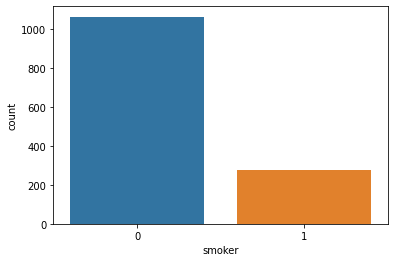

In [1252]:
# Using the countplot function from seaborn to plot the count of values in the 'smoker' column
sns.countplot(x='smoker',data=path)

In [1253]:
# Creating a scatter plot using the scatter function from plotly express
# Mapping the x-axis to the 'age' column and the y-axis to the 'charges' column
# Assigning color to the data points based on the 'bmi' column
fig = px.scatter(path, x="age", y="charges", color="bmi")
fig.show()

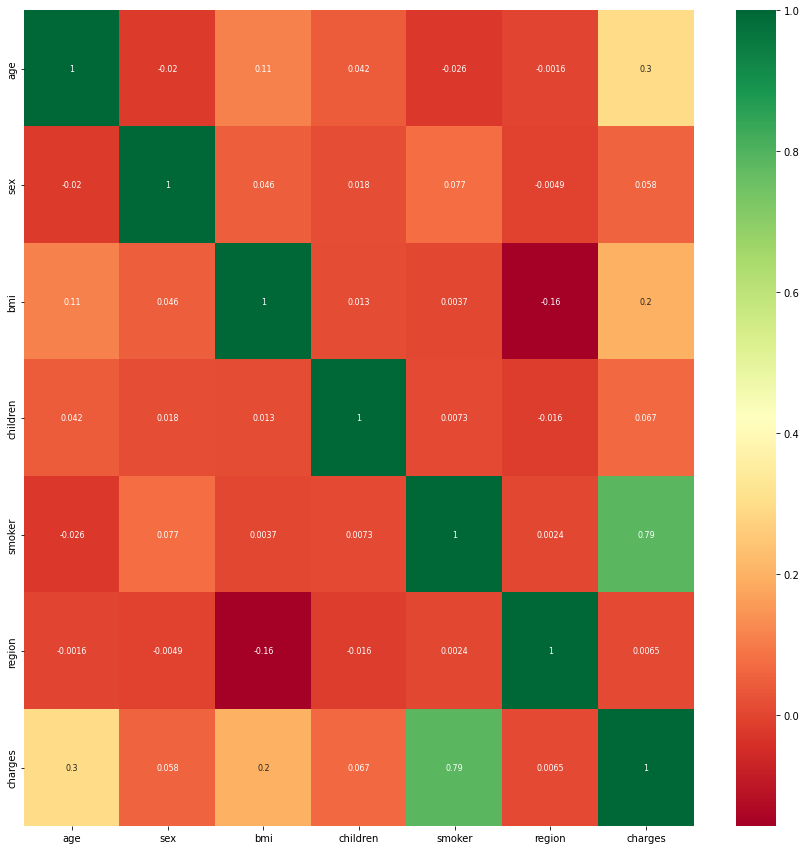

In [1254]:
# Creating a figure with specified size
plt.figure(figsize=(15, 15))
#Setting the argument "annot" to True to display the values of the correlation matrix in the cells of the heatmap
# Setting the color map to "RdYlGn"
# Setting the argument "annot_kws" to {"size": 8} to set the size of the annotations in the cells
sns.heatmap(path.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":8})

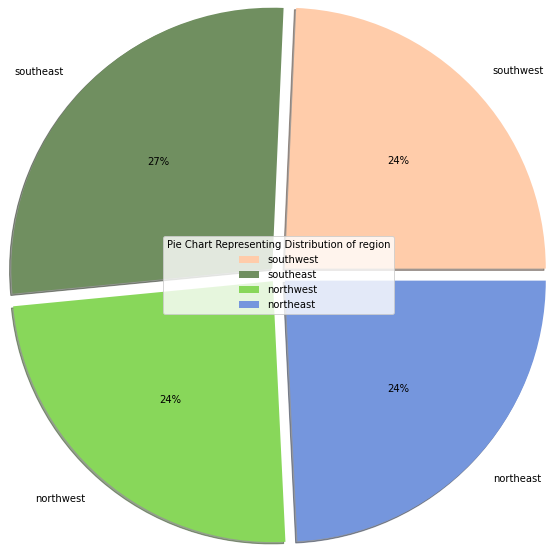

In [1255]:
# Grouping data based on 'region' column
out_data = pd.DataFrame(path.groupby('region')['region'].count())
# Defining new color palette
colors = ['#ffccaa','#708f60','#88d75a', '#7596dd', '#878eb8']

# Plotting pie chart
plt.pie(out_data['region'], labels=['southwest','southeast','northwest','northeast',],autopct='%.0f%%', colors=colors, radius=3, explode = (0.1, 0.1,0.1,0.1),shadow=True)
#Adding the title for the pie chart
plt.legend(title = "Pie Chart Representing Distribution of region", loc="center")
# Displaying the plot
plt.show()


## 3. Build Primary Model[Multiple Linear Regression]:

Once you have cleaned, transformed and Visualize your data build Multiple Linear Regression Model from
Scratch.

In [1256]:
#Standardizing the dataset to make sure that all of its features have a comparable scale.
path = (path - path.mean())/path.std()
#printing the data after standarizing.
path

,age,sex,bmi,children,smoker,region,charges
0,-1.439879,-1.009393,-0.452990,-0.908894,1.968924,-1.342660,0.297745
1,-1.511082,0.989953,0.509231,-0.079412,-0.507512,-0.437853,-0.954024
2,-0.799051,0.989953,0.383011,1.579552,-0.507512,-0.437853,-0.729100
3,-0.443036,0.989953,-1.304564,-0.908894,-0.507512,0.466953,0.718835
4,-0.514239,0.989953,-0.292347,-0.908894,-0.507512,0.466953,-0.777208
...,...,...,...,...,...,...,...
1333,0.767417,0.989953,0.050250,1.579552,-0.507512,0.466953,-0.221180
1334,-1.511082,-1.009393,0.205976,-0.908894,-0.507512,1.371760,-0.914353
1335,-1.511082,-1.009393,1.014110,-0.908894,-0.507512,-0.437853,-0.961927
1336,-1.297473,-1.009393,-0.797226,-0.908894,-0.507512,-1.342660,-0.930705


In [1257]:
#Transforming the data from the dataframe into numpy arrays
#Converting the data into numpy array ensures that they are in the correct format for use in building a machine learning model
age= path['age'].to_numpy()
sex = path['sex'].to_numpy()
bmi = path['bmi'].to_numpy() 
children = path['children'].to_numpy()
smoker = path['smoker'].to_numpy()
region = path['region'].to_numpy()
charges = path['charges'].to_numpy()

In [1258]:
# Sanity Check
# Check if the shapes of the arrays are equal
if age.shape == sex.shape == bmi.shape == children.shape == smoker.shape == region.shape == charges.shape:
   # If they are, proceed further
  print("Proceed Further") 
else:
   # If they are not, print an error message
  print("Array Conversion Error: Try Again")

Proceed Further


In [1259]:
# Initializing matrices to hold our data

# Creating an array of ones with length equal to the number of elements in the 'age' column
x0 = np.ones(len(age)) 

# Combining all independent arrays into a single array by transposing the array
X2 = np.array([x0, age, sex, bmi, children, smoker, region]).T 
#Using 'x0' beacuse this allows for a more flexible fit of the regression line to the data, which can lead to improved model accuracy

# Initializing an array of zeros with the same number of columns as X2
W = np.zeros(X2.shape[1]) #initial value of coefficients(weight)
#This allows the algorithm to converge to the best values for the coefficients, based on the optimization criteria and the data

#Storing the dependent variable as an array in the 'Y2' variable
Y2 = np.array(charges)

In [1260]:
#Define the cost function
    # Calculate the number of data points in the dataset
def cost_function(X, Y, W):

    m = len(Y) #len of data in the datasets
   
   #Calculating accumulated mean square error
    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)  #Sum of the square of the differences between the predicted and actual target values, divided by 2 * m
    #Return the value of J
    return J

In [1261]:
# Store the result of the cost function in a variable called 'initial_cost'
inital_cost = cost_function(X2, Y2, W) #Input Parameters: X2, Y2, W
print(inital_cost)

0.49962602842183995


In [1262]:
#Optimization = minimizing cost error
def gradient_descent(X, Y, B, alpha, iterations): 

    #After each iteration, creating a list of zeros with the length "iterations" to hold the value of the cost function.
    cost_history = [0] * iterations
    
    m = len(Y) #len of data in the datasets
    
    for iteration in range(iterations): #Loop iterates until the stated number of iterations is attained.
        # Hypothesis Values
        Y_pred = X.dot(B)

        # Difference between actual target values and the hypothesis Y
        loss = Y_pred - Y

        # Gradient Calculation
        dw = (X.T.dot(loss) ) / (m) #Calculating Derivation

        # Changing Values of B using Gradient
        B = B - alpha * dw

        # Update the cost history with the new cost value using the cost function to create a new cost value.
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [1263]:
alpha = 0.0001 # Learning Rate.

#Keeping track of the outcomes of gradient descent into new weights and cost histories, respectively 
new_weights, cost_history = gradient_descent(X2, Y2, W, alpha, 100000)

# New Values of Weights
print(new_weights)

# Final Cost of our Iterations.
print(cost_history[-1]) #Printing the lowest value in reverse way 

[-6.87681608e-17  2.98260344e-01 -5.31345046e-03  1.67537339e-01
  4.76653919e-02  7.94171149e-01  3.23005588e-02]
0.12462100606702542


## 4.Model Evaluation

Pick an appropriate evaluation metric to evaluate your model on the test set.

In [1264]:
# Model Evaluation - RMSE is a tool that estimates the size of the mistake.
def rmse(Y, Y_pred):


  #Calculate and square the difference between the actual and anticipated numbers, then take the average of these squared discrepancies.
  #Finally, the average squared difference's square root is calculated.
  rmse = np.sqrt(sum((Y-Y_pred)**2)/len(Y))
  return rmse

# Model evaluation - R2, which shows the percentage of a dependent variable's variance that can be predicted from the independent variables

def r2(Y, Y_pred):

  mean_y = np.mean(Y) #Calculating the mean of 'Y'

  #Calculating the "total sum of squares" involves adding up the disparities in squares between each value of Y and its mean.
  ss_tot = sum((Y - mean_y) ** 2)

  #Adding up the squared differences between each value of Y and Y pred to determine the "residual sum of squares"
  ss_res = sum((Y - Y_pred) ** 2)

  #Calculating R-Squared error by multiplying the ss res/ss tot ratio by one.
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [1265]:
#Calculating the predicted dependent variable using the independent variable 'X' and the optimized weights 'new_weights' obtained from the gradient descent optimization.
Y_pred = X.dot(new_weights)

#Storing the result of the 'rmse' function 
rmse = (rmse(X, Y_pred))

#Storing the result of 'r2' function
r2 = (r2(X, Y_pred))

print(rmse)
print(r2)

0.4992414367157947
0.7505714294736331


In [1266]:
print("Accuray without pca",(r2)*100)

Accuray without pca 75.0571429473633


## 5. Dimensionality Reduction:

Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced fea-
tures,evaluate the model and Compare the output with the evaluation from step 4.

In [1267]:
from sklearn.decomposition import PCA

In [1268]:
# Reduce the dimensionality of the data
pca = PCA(n_components=5) #Choosing '5' as n component
X_reduced = pca.fit_transform(X) # Computing the principal components of tha data and transformiing the data to 5 dimensions
W2 = np.zeros(X_reduced.shape[1]) #Initializing the array of zeros with the same number of columns as 'X_reduced'
X = np.array(charges) #Coverting dependent variable to array and storing it in variable 'X'

In [1269]:
#Define the cost function
#This function evaluate the performance of the linear regression model by calculating the average difference between the predicted values and the actual target values.
def cost_function_reduced(X, Y, theta):
    m = len(Y) #len of data in the datasets
    
    #Calculating accumulated mean square error
    J = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)  #Sum of the square of the differences between the predicted and actual target values, divided by 2 * m
    return J

In [1270]:
#initial_cost store the result of the 'cost_function_reduced'
inital_cost = cost_function_reduced(X_reduced, X, W2) #Input Parameters: X_reduced, X, W2
print(inital_cost)

0.49962602842183995


In [1271]:
# Model Evaluation - RMSE is a tool that estimates the size of the mistake.
def gradient_descent_reduced(X, Y, B, alpha, iterations): 

    #Creating a list of zeros with length 'iterations' to store the value of the cost function after each iteration
    cost_history = [0] * iterations 

    m = len(Y) #len of data in the datasets
    
    for iteration in range(iterations): #Iterating loop until the number of iterations specified is reached
        # Hypothesis Values
        Y_pred = X.dot(B)

        # Difference b/theta Hypothesis and Actual target values Y
        loss = Y_pred - Y

        # Gradient Calculation
        dw = (X.T.dot(loss) ) / (m) #Calculating Derivation

        # Changing Values of B using Gradient
        B = B - alpha * dw

        # New Cost Value using the cost_function and updating the cost_history with the new cost value
        cost = cost_function_reduced(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [1272]:
alpha = 0.0001 # Learning Rate.

#Storing the result of 'gradient_descent_reduced' into 'new_weights_pca' and 'cost_history_pca' respectively 
new_weights_pca, cost_history_pca = gradient_descent(X_reduced, X, W2, alpha, 100000)

# New Values of Weights
print(new_weights_pca)

# Final Cost of our Iterations.
print(cost_history_pca[-1]) #Printing the lowest value in reverse way 

[-0.24100406  0.43217244  0.24949336 -0.30496881  0.59222752]
0.12471574808343024


In [1273]:
# Model Evaluation - RMSE which provides an idea about the magnitude of the error
def rmse_reduced(Y, Y_pred):


  #Difference between the actual and predicted values is calculated and squared then the average of these squared differences is taken. 
  #Finally, the square root of the average squared difference is taken
  rmse = np.sqrt(sum((Y-Y_pred)**2)/len(Y))
  return rmse

# Model Evaluation - R2 which represents the proportion of the variance for a dependent variable

def r2_reduced(Y, Y_pred):

  mean_y = np.mean(Y) #Calculating the mean of 'Y'

  #Calculating the 'total sum of squares' 
  ss_tot = sum((Y - mean_y) ** 2)

  #Calculating the 'residual sum of squares'
  ss_res = sum((Y - Y_pred) ** 2)

  #Calculating R-Squared error by subtracting the ratio of ss_res to ss_tot with 1
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [1274]:
#Calculating the predicted dependent variable using the independent variable 'X_reduced' and the optimized weights 'new_weights_pca' obtained from the gradient descent optimization.
Y_pred = X_reduced.dot(new_weights_pca)

#Storing the result of the 'rmse_reduced' function 
rmse_pca = (rmse_reduced(X, Y_pred))

#Storing the result of the 'r2_pca' function 
r2_pca = (r2_reduced(X, Y_pred)) 

In [1275]:
# Compare the RMSE with and without PCA
#r2 is the percentage of the target variable's variance that the model accounts for.

print('RMSE without PCA:', rmse)
print(r2)

print('RMSE with PCA:', rmse_pca)
print(r2_pca)
print(f"Using Linear Regression the accuracy on test set without pca is : {np.round(r2, 3)*100.0}")

print(f"Using Linear Regression the accuracy on test set with pca is : {np.round(r2_pca, 3)*100.0}")

RMSE without PCA: 0.4992414367157947
0.7505714294736331
RMSE with PCA: 0.4994311726022518
0.7503818036114578
Using Linear Regression the accuracy on test set without pca is : 75.1
Using Linear Regression the accuracy on test set with pca is : 75.0


## 6. Conclusion:

Conclude the result of the comparison.

In this instance, compared to the model without PCA, PCA did not significantly increase the linear regression model's accuracy. Based on MSE and R2, which are typical metrics for assessing regression models, there was hardly any difference between the two regression models. If the predicted value is less than the actual value, a lower MSE score indicates that the model is fitting. Compared to models without PCA, there is only a very modest increase in MSE when PCA is utilized. As a result, PCA has little impact on the target variable's predictability. We may calculate how much of the variation of the target variable the model can explain based on the R2 score. Fit values closer to 0 or 1 represent a weaker fit, respectively.Fit values closer to 0 indicate a weaker fit than values closer to 1.It can be seen that the R2 score for the model with PCA is slightly lower than the score for the model without PCA, further proving that PCA did not significantly improve the model's accuracy.In this instance, PCA may not be needed due to the small performance difference between the two models.It's critical to remember that PCA is just one of many preprocessing techniques that may be used on a dataset, and that its effects on the precision of the final model depend on the particular issue you are attempting to address. In general, it's a good idea to experiment with various preprocessing methods and evaluate how they affect the model's accuracy.

The study's findings indicate that the original features in the data successfully captured significant information and that PCA did not significantly increase model accuracy.

# **Part II : Logistic Regression**


## Mounting

In [1276]:
from google.colab import drive #mouting the contents on google collab from the file saved in the google drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1277]:
coursework_hridaya1 = "/content/drive/MyDrive/AI_Final_Portfolio/3.csv"#giving path to the dataset

In [1278]:
coursework_hridaya1 = pd.read_csv(coursework_hridaya1) #reading the dataset using pandas library
coursework_hridaya1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## 1. Data Understanding, Cleaning and Transformation

Understand what is data about and why do you think the data was collected, and what research questions
data can answers.

(a) You can explain your logic in the text cell of your notebook.

(b) Based on your research questions Identify Dependent and Independent Variables.

(c) Use pandas to load your dataset and observe the data.
If required perform basic data cleaning and Transformation the way you fits your task requirements.

Based on a set of independent factors (Age, Sex, BP, Cholesterol, Na to K), the presented dataset is a classification job for predicting the type of drug (DrugY, DrugC, DrugX, DrugA, DrugB) that would be prescribed to a patient. The final targeted variable is the type of medicine, while the other 5 columns are independent variables that have a direct impact on the final targeted variable. The dataset has 200 rows and 6 columns.
The information appears to be a clinical dataset with details on individuals and the medications they are taking. The following columns are present in the data:
1. Age: The patient's age.
2. Sex: The patient's gender.
3. BP: The patient's blood pressure, indicated as "HIGH," "LOW," or "NORMAL."
4. Cholesterol: The patient's cholesterol level, indicated as "HIGH" or "LOW."
5. Na to K: The blood of the patient's sodium to potassium ratio.
6. Drug: The name of the drug

Analyzing each variable's influence on the prescribed medicine type can help you comprehend how each independent variable affects the desired variable. For instance, the type of medication recommended to a patient may be influenced by the patient's age, as older people may require different medications than younger patients. Similar to how gender might influence what kind of medication is provided, patients may be given different medications depending on their gender. The other factors, such as blood pressure, cholesterol, and Na to K, are also very important in selecting the kind of medication that is provided to a patient.

The following dataset answers different types of questions. Such as:
1.   What are the attributes and characteristics of each drug, such as its chemical composition and effects?
2.   How can machine learning algorithms be used to predict the category of a drug based on the provided information?

By contrasting the anticipated drug categories with the actual ones, it is possible to assess the prediction's accuracy. Researchers and healthcare practitioners who want to better understand the relationship between patient characteristics and the kind of medication provided will find this data collection to be helpful. The analysis's conclusions can be used to improve patient care and the prescription process.





In [1279]:
#checking for null values
coursework_hridaya1.isnull()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [1280]:
#Checking all the columns in the dataset
coursework_hridaya1.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [1281]:
#Viewing first 5 data of the dataset
coursework_hridaya1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [1282]:
#Viewing last 5 data of the dataset
coursework_hridaya1.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [1283]:
##Checking the information of a Dataset object using the .info() method
coursework_hridaya1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [1284]:
#Checking the datatypes of the dataframe.
coursework_hridaya1.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [1285]:
#Adding to check if null value in the dataset exist
coursework_hridaya1.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [1286]:
#Checking the shape of the dataframe.
coursework_hridaya1.shape

(200, 6)

In [1287]:
#Obtaining descriptive statistics of the numerical columns
coursework_hridaya1.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [1288]:
#calculate the pairwise correlation between columns in a dataframe.
coursework_hridaya1.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [1289]:
#checks for duplicates in a dataframe, coursework_hridaya1, by using the .duplicated()
x=coursework_hridaya1.duplicated().sum()
print("Number of Duplicate data=",x)

Number of Duplicate data= 0


In [1290]:
# summarizes the mean values of all numerical columns in the original dataframe, grouped by the "Age" column. 
coursework_hridaya1.groupby('Age').mean()

,Na_to_K
Age,
15,14.338333
16,15.509667
17,10.832000
18,23.404667
19,19.641000
20,16.967000
21,28.632000
22,15.964600
23,16.497143


## Data Analysis and Visualization:

**Data Analysis**

In [1291]:
#gives only the categorical features from the dataset
object_data=[features for features in coursework_hridaya1.dtypes[coursework_hridaya1.dtypes == 'object'].index]
object_data

['Sex', 'BP', 'Cholesterol', 'Drug']

In [1292]:
#Finding unique values of column sex
coursework_hridaya1['Sex'].unique()

array(['F', 'M'], dtype=object)

In [1293]:
#mapping the column sex according to its unique value to ordinal number
coursework_hridaya1['Sex']=coursework_hridaya1['Sex'].map({'F':1, 'M':0})

In [1294]:
#Finding unique values of column bp
coursework_hridaya1['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [1295]:
#mapping the column bp according to its unique value to ordinal number
coursework_hridaya1['BP']=coursework_hridaya1['BP'].map({'HIGH':2, 'LOW':1, 'NORMAL':0})

In [1296]:
#Finding unique values of column cholesterol
coursework_hridaya1['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [1297]:
#mapping the column cholesterol according to its unique value to ordinal number
coursework_hridaya1['Cholesterol']=coursework_hridaya1['Cholesterol'].map({'HIGH':1, 'NORMAL':0})

In [1298]:
#Finding unique values of column drug
coursework_hridaya1['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [1299]:
#mapping the column drug according to its unique value to ordinal number
coursework_hridaya1['Drug']=coursework_hridaya1['Drug'].map({'DrugY':1, 'drugC':2, 'drugX':3, 'drugA':4, 'drugB':0})

In [1300]:
#checking for numerical data and validating if all the categorical data is changed into numerical
num_data=[features for features in coursework_hridaya1.dtypes[coursework_hridaya1.dtypes != 'object'].index]
num_data

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

In [1301]:
#print all the data of the dataset to check
coursework_hridaya1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,1
1,47,0,1,1,13.093,2
2,47,0,1,1,10.114,2
3,28,1,0,1,7.798,3
4,61,1,1,1,18.043,1
...,...,...,...,...,...,...
195,56,1,1,1,11.567,2
196,16,0,1,1,12.006,2
197,52,0,0,1,9.894,3
198,23,0,0,0,14.020,3


In [1304]:
#dropping column sex 
coursework_hridaya1.drop(['Sex'], axis=1, inplace=True) 


In [1305]:
#checking if the column is dropped properly
coursework_hridaya1.head()

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,2,1,25.355,1
1,47,1,1,13.093,2
2,47,1,1,10.114,2
3,28,0,1,7.798,3
4,61,1,1,18.043,1


**Data visualization**

Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make
various plots to generate insights from dataset.
To generate better insights from the data make visualization and plot of your Independent variable against
Dependent variable.

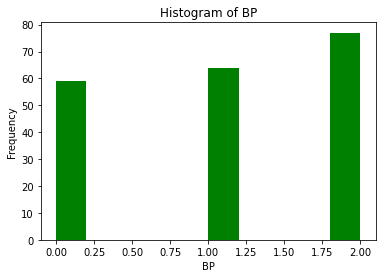

In [1306]:
# Creating a histogram of the values in the "age" column and setting the color of the bars to "green".
plt.hist(coursework_hridaya1['BP'],color='green')
#Setting x-axis as BP
plt.xlabel("BP")
#Setting y-axis as Frequency
plt.ylabel("Frequency")
#Adding the title of the histogram
plt.title("Histogram of BP")
plt.show()

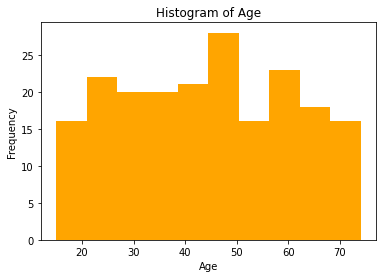

In [1307]:
# Creating a histogram of the values in the "age" column and setting the color of the bars to "green".
plt.hist(coursework_hridaya1['Age'],color='orange')
#Setting x-axis as Age
plt.xlabel("Age")
#Setting y-axis as Frequency
plt.ylabel("Frequency")
#Adding the title of the Histogram
plt.title("Histogram of Age")
plt.show()

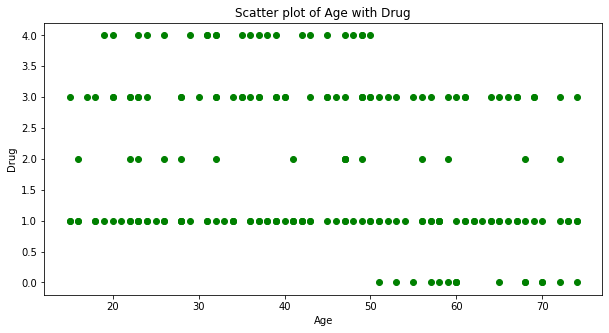

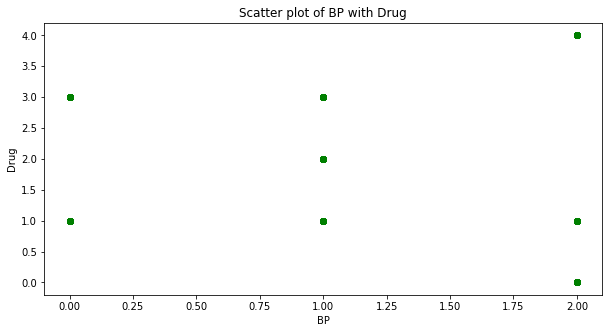

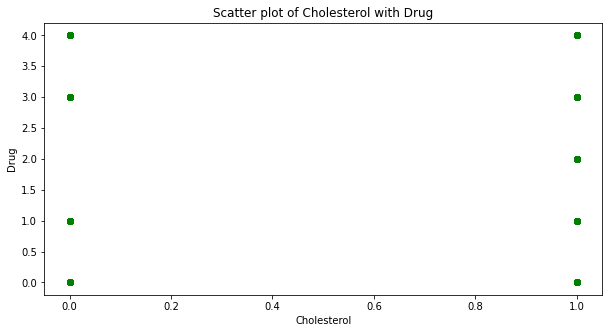

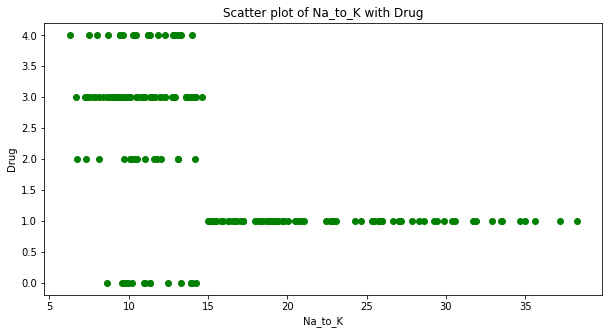

In [1308]:
# Loop over all the columns except the last one in the dataframe "coursework_hridaya1"
for column in coursework_hridaya1.columns[:-1]:
    # Creating a new figure with specified size
    plt.figure(figsize=(10,5))
    # Plotting a scatter plot with column values on the x-axis and "drug" on the y-axis
    plt.scatter(coursework_hridaya1[column], coursework_hridaya1['Drug'], color='green')
    # Adding a title to the plot with the column name and "Charges"
    plt.title(f"Scatter plot of {column} with Drug")
    # Labelling the x-axis with the column name
    plt.xlabel(column)
    # Labelling the y-axis with "Drug"
    plt.ylabel("Drug")
    # Displaying the plot
    plt.show()

In [1309]:
#creating a scatter plot with three variables: Age, Drug, and BP. The data is being sourced from a data frame named "coursework_hridaya1".
fig = px.scatter(coursework_hridaya1, x="Age", y="Drug", color="BP")


fig.show()

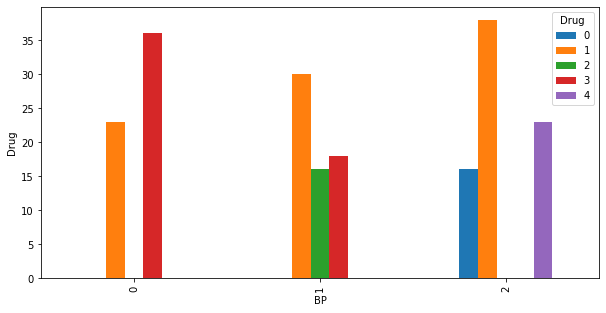

In [1302]:
# Construct a contingency table from the coursework hridaya1's Age and Drug columns.
bargraph = pd.crosstab(coursework_hridaya1.BP, coursework_hridaya1.Drug)

# Create a bar plot using Pandas
bargraph.plot(kind='bar', xlabel='BP', ylabel='Drug',figsize=(10,5))


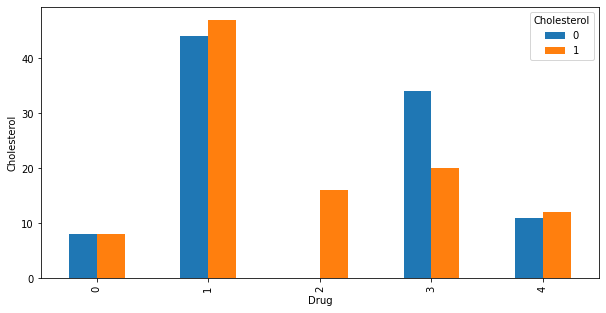

In [1303]:
# Create a contingency table of the drug and cholesterol columns in coursework_hridaya1
bargraph = pd.crosstab(coursework_hridaya1.Drug, coursework_hridaya1.Cholesterol)

# Create a bar plot using Pandas
bargraph.plot(kind='bar', xlabel='Drug', ylabel='Cholesterol',figsize=(10,5))


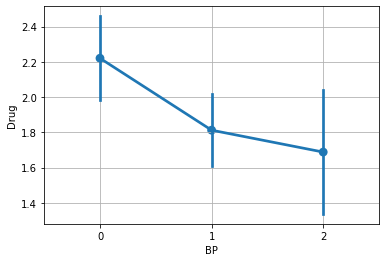

In [1310]:
#The plot between BP and Drug
sns.pointplot(x = 'BP', y = 'Drug', data = coursework_hridaya1)
plt.grid()
plt.show()

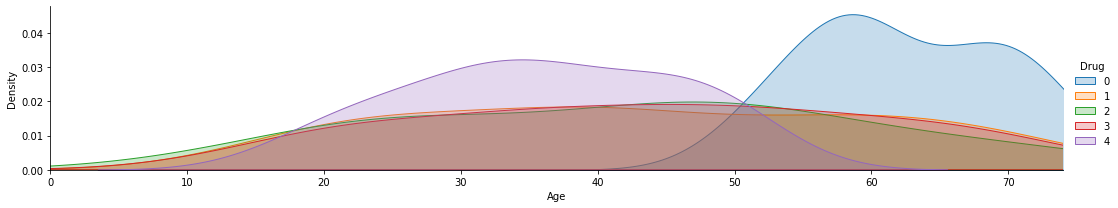

In [1311]:
# Create a FacetGrid plot with the data frame "coursework_hridaya1"
# hue argument specifies the variable "Drug" to use for coloring the subplots
fig = sns.FacetGrid(coursework_hridaya1, hue="Drug", aspect =5)
fig.map(sns.kdeplot, 'Age', shade=True)
# Find the maximum value of the "Age" variable in the data frame
oldest = coursework_hridaya1['Age'].max()
fig.set(xlim=(0, oldest))
# Set the x-axis limit for the plot to be from 0 to the maximum value of the "Age" variable
fig.add_legend()
# Add a legend to the plot to identify the different "Drug" groups


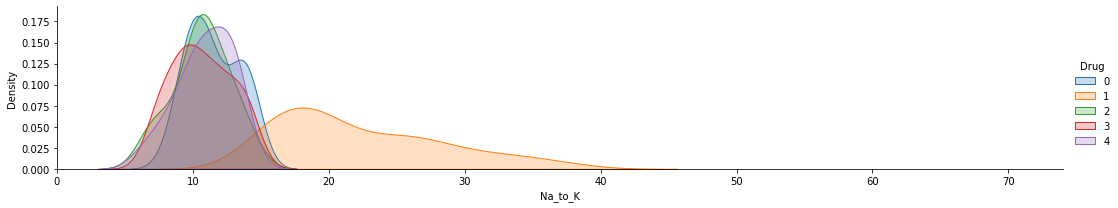

In [1312]:
# hue argument specifies the variable "Drug" to use for coloring the subplots
# aspect argument sets the aspect ratio of the subplots
fig = sns.FacetGrid(coursework_hridaya1, hue="Drug", aspect =5)
# The kdeplot function creates a kernel density estimate plot
# The "Na_to_K" variable is used as the x-axis and "shade" argument is set to True to fill the area under the curve
fig.map(sns.kdeplot, 'Na_to_K', shade=True)
oldest = coursework_hridaya1['Age'].max()
# Set the x-axis limit for the plot to be from 0 to the maximum value of the "Age" variable
fig.set(xlim=(0, oldest))
# Add a legend to the plot to identify the different "Drug" groups
fig.add_legend()

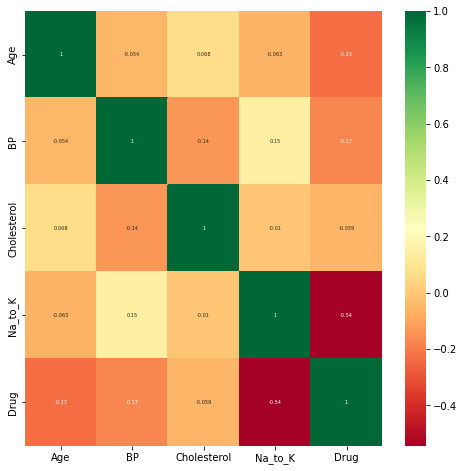

In [1313]:
# Create a figure with specified size
plt.figure(figsize=(8, 8))
# Use seaborn's heatmap function to plot a correlation matrix heatmap of the data in the data frame "coursework_hridaya1"
sns.heatmap(coursework_hridaya1.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":5})

## Build Primary Model

Once you have cleaned, transformed and Visualize your data build Logistic Regression Model from Scratch.

In [1314]:
# Splitting the data into dependent and independent variables
dependent = coursework_hridaya1['Drug']

In [1315]:
indi = coursework_hridaya1.drop(['Drug'], axis = 1)
print(indi.shape)
print(indi.columns)

(200, 4)
Index(['Age', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')


In [1316]:
#Taking sample of 5 data
coursework_hridaya1.sample(5) 

,Age,BP,Cholesterol,Na_to_K,Drug
134,42,2,1,21.036,1
139,69,0,1,10.065,3
151,68,2,1,11.009,0
157,53,1,1,22.963,1
135,74,1,0,11.939,3


In [1317]:
from sklearn.model_selection import train_test_split
# Importing the train_test_split function from the sklearn library

In [1318]:
# Split the data in the "indi" and "dependent" variables into training and test sets using the train_test_split function
# The test_size argument is set to 0.4, which means 40% of the data will be used for testing and 60% for training
# The random_state argument is set to 0 to ensure reproducibility of the results
X_train, X_test, Y_train, Y_test = train_test_split(indi, dependent, test_size=0.4, random_state=0)

# Print the sizes of the training and test sets for both the independent and dependent variables
print('Size of X_train = ', X_train.shape)
print('Size of X_test  = ', X_test.shape)
print('Size of Y_train = ', Y_train.shape)
print('Size of Y_test  = ', Y_test.shape)

Size of X_train =  (120, 4)
Size of X_test  =  (80, 4)
Size of Y_train =  (120,)
Size of Y_test  =  (80,)


In [1319]:
from sklearn.preprocessing import StandardScaler
#creating an instance of sk learn class 
sc = StandardScaler()

In [1320]:
# Utilizing the sc instance of StandardScaler, fit and convert the first train dataset.
X_train = sc.fit_transform(X_train)
# Use the sc instance of StandardScaler to transform the first test dataset.
X_test = sc.transform(X_test)

In [1321]:
#Using gradient descent optimization, the multi-class logistic regression algorithm
class LogisticRegressions:
    #Setting default values for the learning rate, iterations, classes, and weights when initializing the class
    def __init__(self, learning_rate=0.01, num_iterations=10000, num_classes=5):
        self.learning_rate = learning_rate #Determines how many steps the algorithm will take to arrive at the best result.
        self.num_iterations = num_iterations #establishes how frequently the algorithm will iterate to update the weights.
        self.weights = None #In each iteration, weights will be tuned to fit the model.
        self.num_classes = num_classes #Determines how many classes are present in the target variable.
    #Calculating the probability scores for each class using the softmax activation function.
    def softmax(self, z): 
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True) #Keepdims = True makes ensuring that the array's dimensions match those of np.exp (z)
    #Dividing the result by the np.exp elements after computing the total of the exponentials along the rows (z)
    def one_hot_encoding(self, y):
        one_hot = np.zeros((y.shape[0], self.num_classes))##Creating a matrix with self.num classes columns and y.shape[0] rows, with all entries set to 0.
        one_hot[np.arange(y.shape[0]), y] = 1 #the column corresponding to the class label of each data point in each row of the matrix is set to 1.
        return one_hot 
    #In logistic regression, this is required to construct the loss function.
    def loss(self, h, y_encoded):
        return -np.mean(y_encoded * np.log(h)) 
    #The predicted probability' #logarithm h is multiplied elementally with the encoded true labels after being taken elementally.
    # In order to reduce the loss function, the mean of the result is taken and negated.
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))#Adding a column of ones to the input feature matrix X
        self.weights = np.zeros((X.shape[1], self.num_classes))#Initializing the weights to zeros 
        y_encoded = self.one_hot_encoding(y)#Using one-hot encoding, the category target is transformed into a numerical format that may be utilized to train the model.
    
        for i in range(self.num_iterations): #until num iterations is reached, iterating the for loop.
            z = X @ self.weights #Calculating the dot product of the feature matrix X and the weight matrix self to determine activation levels. weights
            h = self.softmax(z) ##Using the softmax function to forecast the probabilities for each class using the values of 'z'
            gradient = X.T @ (h - y_encoded) / y.size #The gradient of the loss function with respect to the weights is calculated.
            self.weights -= self.learning_rate * gradient #By removing the gradient and learning rate product, the weights are updated.
        
    def predict_probability(self, X): 
        X = np.hstack((np.ones((X.shape[0], 1)), X)) #Adding a column of ones to the input feature matrix X
        z = X @ self.weights #Calculating activation values by calculating the dot product of the feature matrix X and the weight matrix self.weights
        return self.softmax(z) #Passing the 'z' values to softmax function to produce predicted probabilities 'h' for each class

    
    def predict(self, X):
        return np.argmax(self.predict_probability(X), axis=1) #Taking the maximum probability for each sample, which gives the predicted class label

In [1322]:
# Creating an instance of the LogisticRegression class
classfication= LogisticRegressions()

# Fitting the logistic regression model to the X_train and Y_train datasets
classfication.fit(X_train, Y_train)
#Fitting the logistic regression model to the training data using the fit method on the log reg object.
#The fit method estimates the coefficients of the logistic regression model that best fits the data using the training data (X train and Y train) as input.

In [1323]:
pred_sec=classfication.predict(X_test)
#Given the independent variables in X test, the predict method produces an array of predictions for the dependent variable Y. The Y pred variable has this array as its given value.

In [1324]:
# Predict the target values for the first_test dataset using the trained logistic regression model
pred_reg = classfication.predict(X_test)

# Create a dataframe to display the actual target values and the predicted target values
result = pd.DataFrame(np.c_[Y_test, pred_reg], columns=['Actual', 'Predicted'])

# Taking sample of 20 from the result
result.sample(20)


,Actual,Predicted
74,4,4
10,4,4
68,3,3
21,3,3
48,4,4
12,1,1
11,1,1
37,1,1
28,1,1
60,1,1


## Model Evaluation

Pick an appropriate evaluation metric to evaluate your model on the test set.

In [1325]:
# Importing the confusion_matrix, classification_report, and accuracy_score functions from the sklearn.metrics module
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Computing the classification report for the test data
print(classification_report(Y_test, pred_reg))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.90      0.97      0.94        39
           2       1.00      0.75      0.86         4
           3       1.00      0.88      0.94        25
           4       1.00      1.00      1.00         8

    accuracy                           0.94        80
   macro avg       0.94      0.92      0.92        80
weighted avg       0.94      0.94      0.94        80



In [1326]:
# Importing the confusion_matrix, classification_report, and accuracy_score functions from the sklearn.metrics module
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Calculating the confusion matrix for the actual target values and the predicted target values
confusion_matrix(Y_test, pred_sec)


array([[ 4,  0,  0,  0,  0],
       [ 1, 38,  0,  0,  0],
       [ 0,  1,  3,  0,  0],
       [ 0,  3,  0, 22,  0],
       [ 0,  0,  0,  0,  8]])

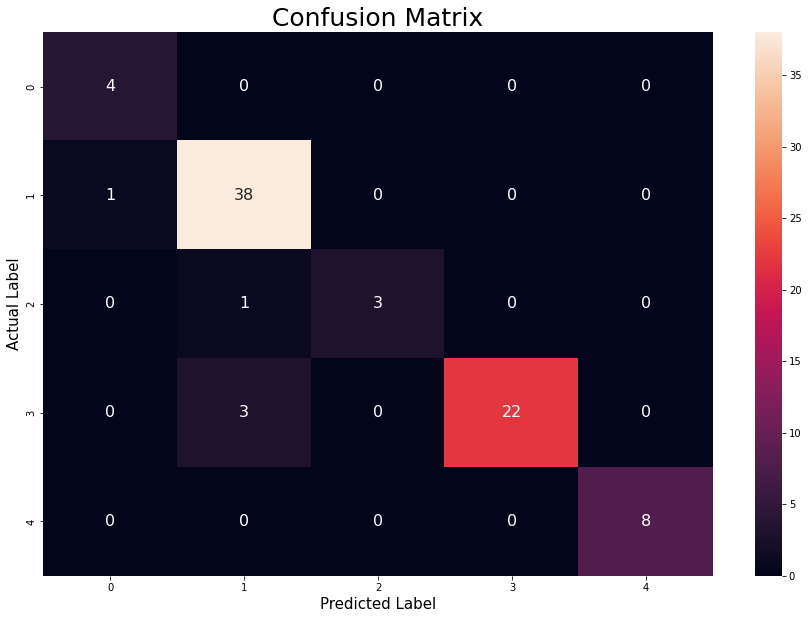

In [1327]:
# Creating a dataframe for the confusion matrix
conf_matrix = pd.DataFrame(confusion_matrix(Y_test, pred_sec))

# Creating a figure object with a specified size
fig = plt.figure(figsize=(15, 10))

# Creating a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='g')

# Adding a title and labels to the heatmap
plt.title("Confusion Matrix",fontsize=25)
plt.xlabel("Predicted Label",fontsize=15)
plt.ylabel("Actual Label",fontsize=15)

# Displaying the confusion matrix heatmap
plt.show()


In [1328]:
# Calculating the accuracy of the logistic regression model
accuracy = accuracy_score(pred_sec, Y_test)

print('Accuracy without PCA:', accuracy)

Accuracy without PCA: 0.9375


In [1329]:
print(f"Using logistic Regression the accuracy on test set before pca is : {np.round(accuracy,3)*100.0}")

Using logistic Regression the accuracy on test set before pca is : 93.8


## Dimensionality  Reduction

Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced fea-
tures,evaluate the model and Compare the output with the evaluation from step 4.

In [1330]:
from sklearn.decomposition import PCA

In [1331]:
#Reducing the dimensionality of the data
pca = PCA(n_components=3) #Choosing '3' as n component
X_reduced = pca.fit_transform(indi) # Calculating the data's primary components and transforming it into three dimensions

In [1332]:
#Splitting the data into training and test sets
# Split the data in the "indi" and "dependent" variables into training and test sets using the train_test_split function
# The test_size argument is set to 0.4, which means 40% of the data will be used for testing and 60% for training
# The random_state argument is set to 0 to ensure reproducibility of the results
from sklearn.model_selection import train_test_split
indi_train_pca, indi_test_pca, dependent_train_pca, dependent_test_pca = train_test_split(X_reduced, dependent, test_size=0.1, random_state=0)
print('Size of X_train = ', indi_train_pca.shape)
print('Size of X_test  = ', indi_test_pca.shape)
print('Size of Y_train = ', dependent_train_pca.shape)
print('Size of Y_test  = ', dependent_test_pca.shape)

Size of X_train =  (180, 3)
Size of X_test  =  (20, 3)
Size of Y_train =  (180,)
Size of Y_test  =  (20,)


In [1333]:
#Modifying the practice and test sets

#Transforming the data to have a mean of 0 and a standard deviation of 1 by using fit transform to fit the standardizing parameters to the data.
X_train_pca = sc.fit_transform(indi_train_pca) 

#Using transform to apply the same standardization to the data as it was applied to the training set.
X_test_pca = sc.transform(indi_test_pca)

In [1334]:
# Creating an instance of the LogisticRegression class and assigning it to classification_pca
classfication_pca = LogisticRegressions()

#Data fitting
classfication_pca.fit(X_train_pca, dependent_train_pca) #Fitting the logistic regression model to the training data using the fit method on the log reg object.
#The fit technique estimates the coefficients of the logistic regression model that best fits the data using the training data (X train pca and Y train pca) as input.

In [1335]:
#Predicting the target vectors
Y_pred_pca = classfication_pca.predict(X_test_pca)#Making predictions based on the test data (X test pca) using the predict method on the classfication pca object.
#Given the independent variables in X test pca, the predict method produces an array of predictions for the dependent variable Y. The Y pred pca variable has this array set to it.
# Creating a dataframe to display the actual target values and the predicted target values
result_pca = pd.DataFrame(np.c_[dependent_test_pca, Y_pred_pca], columns=['Actual Values', 'Predicted Values'])

# Displaying the first 7 rows of the result dataframe
result_pca.sample(7)

,Actual Values,Predicted Values
0,2,3
12,1,1
3,1,1
2,1,1
15,2,3
4,1,1
5,3,3


In [1336]:
#Computing the classification report for the test data
print(classification_report(dependent_test_pca, Y_pred_pca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.91      1.00      0.95        10
           2       0.00      0.00      0.00         2
           3       0.71      0.83      0.77         6
           4       1.00      1.00      1.00         1

    accuracy                           0.85        20
   macro avg       0.72      0.77      0.74        20
weighted avg       0.77      0.85      0.81        20



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



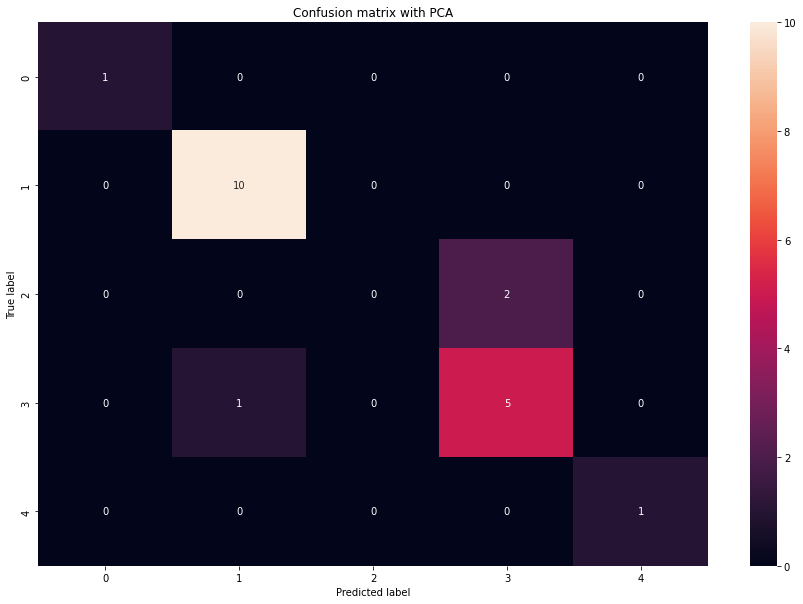

In [1337]:
#Calculating confusion matrix
cm_pca = confusion_matrix(dependent_test_pca, Y_pred_pca)

# Creating a figure object with a specified size
fig = plt.figure(figsize=(15, 10))

# Plot the confusion matrix using seaborn
sns.heatmap(cm_pca, annot = True) #Using the seaborn library to plot a heatmap of the confusion matrix
plt.title('Confusion matrix with PCA') #Setting the title of the plot
plt.xlabel('Predicted label') #Labelling X-axis
plt.ylabel('True label') #Labelling Y-axis
plt.show() #Displaying the plot

In [1338]:
#The input to the function is the predicted values Y_pred_pca and the actual values dependent_test_pca from the test set. 
#The result is stored in the accuracy_pca variable and then printed to the console
accuracy_pca = accuracy_score(Y_pred_pca, dependent_test_pca)
print('Accuracy: ',accuracy_pca)

Accuracy:  0.85


In [1339]:
# Print the accuracy of the model, rounded to 3 decimal places and expressed as a percentage
print(f"Using logistic Regression the accuracy on test set after pca is : {np.round(accuracy_pca, 3)*100.0}")

Using logistic Regression the accuracy on test set after pca is : 85.0


In [1340]:
# multi-class classification
#Import necessary libraries for multiclass classification
from sklearn.multiclass import OneVsRestClassifier #OneVsRestClassifier for handling multiple classes
from sklearn.model_selection import train_test_split # train_test_split for splitting data into training and testing set
from sklearn.metrics import roc_curve,auc # roc_curve and auc for calculating ROC curve
from sklearn.metrics import roc_auc_score # roc_auc_score for calculating the area under ROC curve


In [1341]:
first_train, first_test, second_train, second_test = train_test_split(dependent, indi, test_size=0.4, random_state=42)

In [1342]:
# Create a logistic regression model instance
classfication = LogisticRegressions()

# Fit the model to the training data
classfication.fit(X_train, Y_train)

# Use the model to make predictions on the test data
pred = classfication.predict(X_test)

# Calculate the predicted probabilities for each class in the target variable
pred_prob = classfication.predict_probability(X_test)


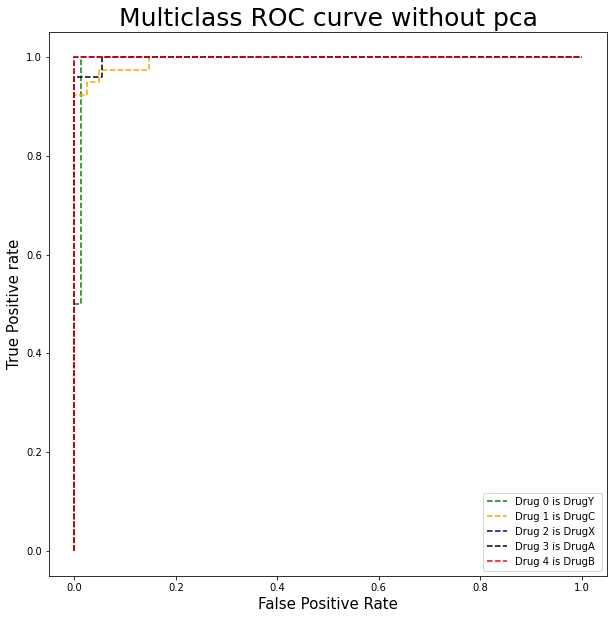

In [1343]:
#Initialize empty dictionaries for fpr, tpr, and threshold values for each class
fpr = {}
tpr = {}
thresh ={}
#Define number of classes as 5
n_class = 5
#Plotting ROC curve with figure size 20x10
plt.figure(figsize=(10,10))
#Loop over the number of classes
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    
# Plot the fpr and tpr values for each class with different colors and labels     
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label='Drug 0 is DrugY')
plt.plot(fpr[1], tpr[1], linestyle='--',color='orange', label='Drug 1 is DrugC')
plt.plot(fpr[2], tpr[2], linestyle='--',color='navy', label='Drug 2 is DrugX ')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='Drug 3 is DrugA')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Drug 4 is DrugB ')
#Set the title, x-axis label and y-axis label for the plot
plt.title('Multiclass ROC curve without pca',fontsize=25)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive rate',fontsize=15)
#Show the legend in the best location
plt.legend(loc='best')
#Save the plot with 300 dpi
plt.savefig('Multiclass ROC',dpi=300); 


In [1344]:
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, dependent, test_size=0.4, random_state=50)
classfication_pca.fit(X_train_pca, dependent_train_pca)
pred = classfication_pca.predict(X_test_pca)
predict_probability = classfication_pca.predict_probability(X_test_pca)

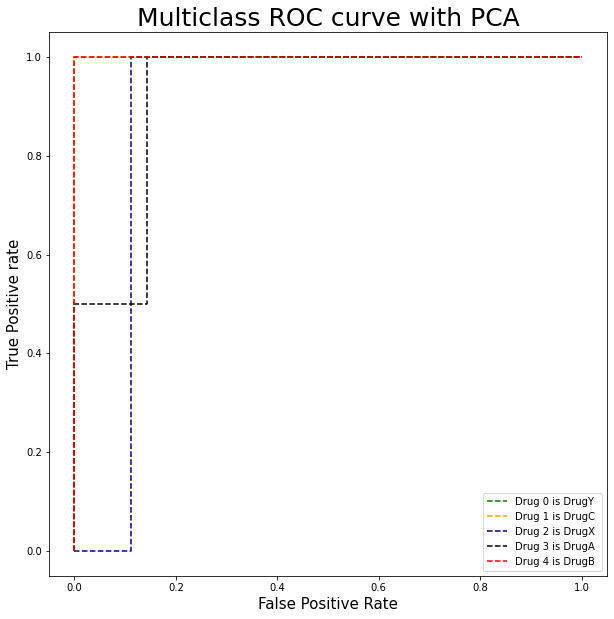

In [1345]:
#Initialize empty dictionaries for fpr, tpr, and threshold values for each class
fpr = {}
tpr = {}
thresh ={}
#Define number of classes as 5
n_class = 5
#Plotting ROC curve with figure size 20x10
plt.figure(figsize=(10,10))
#Loop over the number of classes
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(dependent_test_pca, predict_probability[:,i], pos_label=i)
    
# Plot the fpr and tpr values for each class with different colors and labels     
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label='Drug 0 is DrugY')
plt.plot(fpr[1], tpr[1], linestyle='--',color='orange', label='Drug 1 is DrugC')
plt.plot(fpr[2], tpr[2], linestyle='--',color='navy', label='Drug 2 is DrugX ')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='Drug 3 is DrugA')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Drug 4 is DrugB ')
#Set the title, x-axis label and y-axis label for the plot
plt.title('Multiclass ROC curve with PCA',fontsize=25)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive rate',fontsize=15)
#Show the legend in the best location
plt.legend(loc='best')
#Save the plot with 300 dpi
plt.savefig('Multiclass ROC',dpi=300); 

## Conclusion

Conclude the result of the comparison.

PCA is a commonly used method for reducing the number of features in a dataset while retaining as much important information as possible. It combines the most significant features into a limited number of components that can represent the data in a lower-dimensional space.

However, using PCA can also result in the loss of important information, which may negatively affect the performance of a machine learning model. This is seen in the case mentioned, where the accuracy of the model decreased from 0.95 to 0.85 after using PCA. The higher accuracy without PCA suggests that the original features were crucial for fitting the model accurately and were lost during the PCA process. A predictive model like logistic regression may occasionally perform worse as a result of this information loss. This is because, unlike before PCA was used, the model would not be able to represent the intricate relationships between the features and the target variable in as much detail.Therefore, it is important to weigh the benefits of dimensionality reduction and computational efficiency against the potential loss of information when deciding whether to use PCA. In some cases, it may be more effective to use the original features.

Conclusion: It's probable that PCA has decreased the precision of the logistic regression model, although this isn't always the case, and the influence can change depending on the precise data and task.